In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  

In [27]:
data = pd.read_csv('intermediate results/email_data.csv', usecols=[1,2], names=['v1', 'v2'], header=None)
data.head(n=10)

,v1,v2
0,ham,Subject: job posting - apple-iss research cent...
1,ham,"Subject: lang classification grimes , joseph e..."
2,ham,Subject: query : letter frequencies for text i...
3,ham,Subject: riska colleague and i are researching...
4,ham,Subject: request book informationearlier this ...
5,ham,Subject: call for abstracts : optimality in sy...
6,ham,Subject: m . a . in scandinavian linguisticsm ...
7,ham,Subject: call for papers : linguistics session...
8,ham,Subject: foreign language in commercialsconten...
9,ham,Subject: fulbright announcement : please post ...


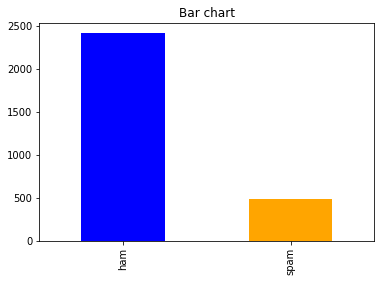

In [28]:
count_Class=pd.value_counts(data["v1"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

In [29]:
count1 = Counter(" ".join(data[data['v1']=='ham']["v2"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(data[data['v1']=='spam']["v2"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

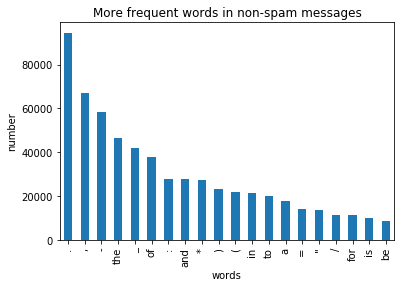

In [30]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

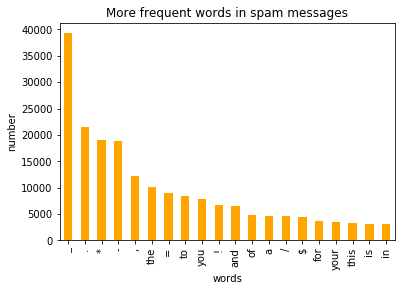

In [31]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [48]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english' )
X = f.fit_transform(data["v2"])
np.shape(X)

(2893, 62416)

In [49]:
data["v1"]=data["v1"].map({'spam':1,'ham':0})
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['v1'], test_size=0.20, random_state=12)
print([np.shape(X_train), np.shape(X_test)])


[(2314, 62416), (579, 62416)]


In [50]:
list_C = np.arange(500, 2000, 100) #100000
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    svc = svm.SVC(C=C)
    svc.fit(X_train, y_train)
    score_train[count] = svc.score(X_train, y_train)
    score_test[count]= svc.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
    count = count + 1 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [24]:
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])

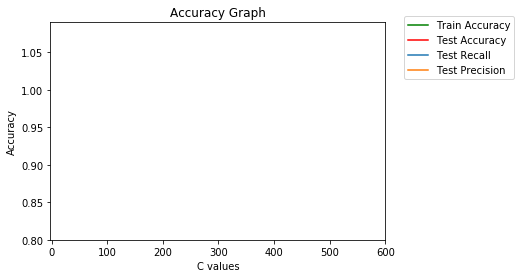

In [22]:
import numpy as np
from matplotlib import pyplot as plt
import math

x = models["C"]

pdf1 = models["Train Accuracy"]
pdf2 = models["Test Accuracy"]
pdf3 = models["Test Recall"]
pdf4 = models["Test Precision"]
#pdf5 = models["Iteration"]

plt.plot(x, pdf1, color='green')
plt.plot(x, pdf2, color='red')
plt.plot(x, pdf3)
plt.plot(x, pdf4)

plt.title('Accuracy Graph')
plt.ylabel('Accuracy')
plt.xlabel('C values')
plt.legend(['Train Accuracy', "Test Accuracy","Test Recall","Test Precision"], bbox_to_anchor=(1.4, 1.05))
plt.ylim([0.8,1.09])
plt.xlim([-2,600])

plt.show()

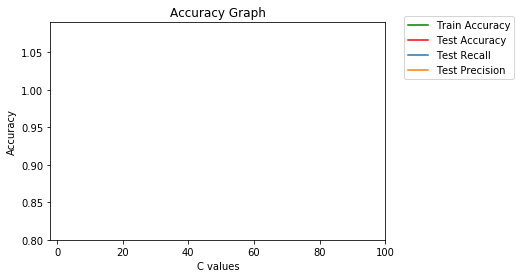

In [23]:
plt.plot(x, pdf1, color='green')
plt.plot(x, pdf2, color='red')
plt.plot(x, pdf3)
plt.plot(x, pdf4)

plt.title('Accuracy Graph')
plt.ylabel('Accuracy')
plt.xlabel('C values')
plt.legend(['Train Accuracy', "Test Accuracy","Test Recall","Test Precision"], bbox_to_anchor=(1.4, 1.05))
plt.ylim([0.8,1.09])
plt.xlim([-2,100])

plt.show()

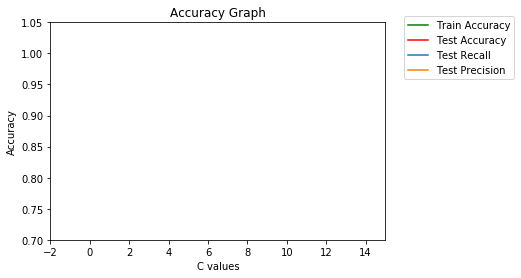

In [16]:
plt.plot(x, pdf1, color='green')
plt.plot(x, pdf2, color='red')
plt.plot(x, pdf3)
plt.plot(x, pdf4)

plt.title('Accuracy Graph')
plt.ylabel('Accuracy')
plt.xlabel('C values')
plt.legend(['Train Accuracy', "Test Accuracy","Test Recall","Test Precision"], bbox_to_anchor=(1.4, 1.05))
plt.ylim([0.7,1.05])
plt.xlim([-2,15])

plt.show()

In [17]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

C                 1.0
Train Accuracy    0.0
Test Accuracy     0.0
Test Recall       0.0
Test Precision    0.0
Name: 0, dtype: float64

In [ ]:
models[models['Test Precision']>=.7].head(n=10)

Between these models with the highest possible precision, we are going to selct which has more test accuracy.

In [ ]:
best_index = models[models['Test Precision']>=.92]['Test Accuracy'].idxmax()
svc = svm.SVC(C=40)
svc.fit(X_train, y_train)
models.iloc[best_index, :]

In [25]:
C=40
svc = svm.SVC(C=C, kernel='rbf', max_iter=-1)
svc.fit(X_train, y_train)
score_train = svc.score(X_train, y_train)
score_test = svc.score(X_test, y_test)
recall_test = metrics.recall_score(y_test, svc.predict(X_test))
precision_test = metrics.precision_score(y_test, svc.predict(X_test))

print ("Train Accuracy",score_train)
print ("Test Accuracy",score_test)
print ("Test Recall",recall_test)
print ("Test Precision",precision_test)

m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
C=10
svc = svm.SVC(C=C, kernel='rbf', max_iter=-1)
svc.fit(X_train, y_train)
traninedmodel = svc.fit(X_train, y_train)
score_train = svc.score(X_train, y_train)
score_test = svc.score(X_test, y_test)
recall_test = metrics.recall_score(y_test, svc.predict(X_test))
precision_test = metrics.precision_score(y_test, svc.predict(X_test))

print ("Train Accuracy",score_train)
print ("Test Accuracy",score_test)
print ("Test Recall",recall_test)
print ("Test Precision",precision_test)

m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

In [ ]:
svc = svm.SVC( coef0=1, kernel='linear', max_iter=-1)
svc.fit(X_train, y_train)
score_train = svc.score(X_train, y_train)
score_test = svc.score(X_test, y_test)
recall_test = metrics.recall_score(y_test, svc.predict(X_test))
precision_test = metrics.precision_score(y_test, svc.predict(X_test))

print ("Train Accuracy",score_train)
print ("Test Accuracy",score_test)
print ("Test Recall",recall_test)
print ("Test Precision",precision_test)

m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

In [ ]:
from sklearn.externals import joblib
# save the model to disk
filename = "support file 1.sav"
joblib.dump(traninedmodel, filename)



filename2 = "support file 2.sav"
traninedmodel_f = feature_extraction.text.CountVectorizer(stop_words = 'english',max_features=3000 )

joblib.dump(traninedmodel_f, filename2)




In [ ]:
import timeit
start_time = timeit.default_timer()
# code you want to evaluate

from sys import argv
#code, email = argv
code, email = "code.py", "spamSample1.txt"
with open(email) as f:
    email = f.read().replace('\n', '')

corpus = {'subject': 2621, 'job': 1494, 'posting': 2094, 'research': 2329, 'length': 1587, 'center': 506, '10': 5, 'million': 1771, 'joint': 1499, 'computer': 645, 'institute': 1420, 'systems': 2677, 'science': 2417, 'national': 1828, 'university': 2848, 'singapore': 2504, 'located': 1638, 'looking': 1648, 'senior': 2453, 'speech': 2558, 'successful': 2634, 'candidate': 477, 'expertise': 1056, 'computational': 644, 'linguistics': 1618, 'including': 1379, 'natural': 1830, 'language': 1550, 'processing': 2157, 'english': 990, 'chinese': 544, 'statistical': 2584, 'modeling': 1790, 'knowledge': 1531, 'state': 2579, 'art': 314, 'corpus': 720, 'based': 386, 'models': 1792, 'required': 2326, 'text': 2724, 'project': 2175, 'following': 1136, 'areas': 302, 'parsing': 1981, 'lexical': 1595, 'database': 773, 'design': 838, 'prosodic': 2189, 'analysis': 254, 'substantial': 2632, 'phonology': 2036, 'syntax': 2674, 'semantics': 2446, 'acoustic': 178, 'phonetics': 2034, 'signal': 2493, 'desirable': 840, 'candidates': 478, 'phd': 2024, 'years': 2992, 'relevant': 2302, 'work': 2971, 'experience': 1051, 'technical': 2703, 'degree': 805, 'strong': 2605, 'software': 2527, 'engineering': 987, 'skills': 2513, 'implementation': 1367, 'positions': 2082, 'unix': 2849, 'preferred': 2117, 'preferably': 2115, 'good': 1224, 'industry': 1398, 'join': 1498, 'new': 1849, 'tools': 2767, 'make': 1683, 'windows': 2959, 'mac': 1667, 'sun': 2645, 'advantage': 207, 'need': 1838, 'apply': 291, 'include': 1376, 'interaction': 1436, 'scientists': 2420, 'efforts': 961, 'california': 467, 'publication': 2207, 'international': 1447, 'scientific': 2419, 'conferences': 662, 'encouraged': 982, 'benefits': 403, 'salary': 2397, 'expenses': 1049, 'send': 2451, 'complete': 631, 'resume': 2349, 'personal': 2017, 'qualifications': 2219, 'contact': 685, 'telephone': 2709, 'number': 1885, 'mr': 1816, 'jean': 1491, 'tel': 2708, '65': 119, 'fax': 1094, 'email': 971, 'sg': 2477, 'lang': 1549, 'classification': 563, 'joseph': 1502, 'barbara': 382, 'family': 1090, 'index': 1385, 'pb': 2007, 'isbn': 1471, 'vi': 2895, 'pp': 2102, '14': 18, '00': 0, 'summer': 2644, 'volume': 2913, 'languages': 1551, 'world': 2977, 'edition': 949, 'lists': 1627, 'families': 1089, 'sub': 2620, 'groups': 1252, 'shown': 2490, 'tree': 2789, 'names': 1825, 'making': 1685, 'data': 772, 'accessible': 165, 'internet': 1448, 'academic': 157, 'books': 432, 'sil': 2498, 'org': 1931, 'reference': 2274, 'culture': 753, 'belief': 398, '25': 62, 'seven': 2474, 'articles': 316, 'discuss': 886, 'indonesia': 1395, 'primary': 2138, 'focus': 1131, 'cultural': 752, 'linguistic': 1616, 'content': 691, 'topics': 2769, 'traditional': 2779, 'certain': 510, 'society': 2522, 'computers': 646, 'ling': 1612, 'david': 777, 'stephen': 2592, 'tool': 2766, 'developing': 848, 'early': 932, 'reading': 2248, 'materials': 1721, 'ms': 1817, 'dos': 916, '26': 64, 'authors': 361, 'present': 2122, 'program': 2169, 'instructions': 1425, 'little': 1632, 'background': 377, 'literacy': 1629, 'book': 430, 'manual': 1693, 'step': 2591, 'procedures': 2153, 'appropriate': 295, 'sequence': 2461, 'words': 2970, 'phrases': 2038, 'sentences': 2457, 'query': 2226, 'letter': 1590, 'inquiry': 1414, 'ab': 150, 'edu': 954, 'associate': 336, 'maryland': 1715, 'field': 1110, 'involves': 1464, 'comparing': 625, 'using': 2869, 'various': 2885, 'algorithms': 238, 'understand': 2828, 'details': 842, 'pass': 1995, 'rate': 2241, 'letters': 1591, 'occur': 1896, 'like': 1605, 'explore': 1063, 'use': 2863, 'sound': 2536, 'texts': 2725, 'specifically': 2556, 'linguist': 1615, 'subscribers': 2629, 'help': 1296, 'recent': 2262, 'literature': 1631, 'concerning': 653, 'identification': 1351, 'suggestions': 2638, 'sent': 2455, 'directly': 877, 'address': 195, 'll': 1635, 'interested': 1441, 'linguists': 1621, 'actually': 186, 'far': 1091, 'removed': 2308, 'people': 2010, 'knew': 1529, 'going': 1221, 'george': 1201, 'indiana': 1388, 'dept': 826, 'slavic': 2514, 'home': 1314, 'try': 2797, 'office': 1902, 'bloomington': 423, 'usa': 2859, 'degrees': 806, 'risk': 2363, 'hong': 1316, 'kong': 1534, 'students': 2611, 'different': 869, 'contexts': 694, 'spoken': 2563, 'area': 301, 'taking': 2686, 'learning': 1575, 'come': 602, 'request': 2322, 'morning': 1804, 'phone': 2032, 'friend': 1170, 'living': 1634, 'south': 2540, 'america': 245, 'talking': 2688, 'spanish': 2546, 'said': 2395, 'la': 1539, 'el': 962, 'purchase': 2214, 'expression': 1067, 'bit': 419, 'asked': 324, 'saying': 2409, 'really': 2254, 'meant': 1734, 'say': 2408, 'buy': 464, 'matter': 1724, 'discussion': 890, 'left': 1583, 'time': 2750, 'mentioned': 1751, 'course': 732, 'conversation': 708, 'translation': 2784, 'french': 1165, 'original': 1944, 'del': 808, 'death': 789, 'does': 908, 'know': 1530, 'deal': 785, 'similar': 2499, 'georgetown': 1202, 'abstracts': 155, 'optimality': 1922, 'syntactic': 2673, 'papers': 1970, 'best': 409, 'workshop': 2975, 'theory': 2737, 'held': 1293, 'massachusetts': 1717, 'technology': 2706, 'cambridge': 471, 'ma': 1666, '19': 27, '21': 55, '1995': 42, 'variety': 2884, 'growing': 1253, 'role': 2370, 'notion': 1877, 'comparison': 626, 'current': 758, 'includes': 1378, 'theories': 2736, 'involving': 1465, 'principles': 2141, 'economy': 943, 'unpublished': 2853, '1993': 40, '1994': 41, 'chomsky': 546, '1989': 36, 'account': 171, 'empirical': 974, 'proposals': 2186, 'mit': 1783, 'particular': 1990, 'issues': 1477, 'significant': 2496, 'consist': 675, 'invited': 1460, 'talks': 2689, 'selected': 2440, 'submitted': 2626, 'questions': 2228, 'nature': 1832, 'set': 2471, 'objects': 1890, 'choice': 545, 'criteria': 745, 'determine': 843, 'output': 1953, 'grammar': 1231, 'compare': 623, 'representations': 2317, 'theoretic': 2734, 'analyses': 253, 'developed': 847, 'acquisition': 180, 'variation': 2882, 'explained': 1059, 'constraint': 680, 'implications': 1369, 'requirements': 2327, 'approaches': 294, 'presented': 2125, 'joan': 1493, 'stanford': 2575, 'jane': 1486, 'rutgers': 2390, 'paul': 2001, 'ucla': 2819, 'submissions': 2624, 'consideration': 672, 'received': 2260, 'march': 1699, '15': 19, 'mail': 1672, 'accepted': 163, 'requested': 2323, 'provide': 2194, 'paper': 1968, 'mid': 1767, 'april': 298, 'able': 152, 'assist': 332, 'travel': 2786, 'costs': 726, 'student': 2610, 'presenters': 2126, '30': 71, 'minute': 1780, 'additional': 194, 'minutes': 1781, 'anonymous': 271, 'longer': 1645, 'pages': 1963, 'mailing': 1675, 'avenue': 371, 'mailings': 1676, 'copies': 713, 'abstract': 154, 'cover': 735, 'sheet': 2482, 'title': 2753, 'author': 360, 'affiliation': 212, 'attention': 350, 'addressed': 196, 'detailed': 841, 'conference': 661, 'information': 1405, 'available': 368, 'ftp': 1172, 'pub': 2205, 'directory': 879, 'references': 2275, 'cited': 554, 'notes': 1873, 'derivation': 829, 'representation': 2316, 'ed': 944, 'working': 2973, 'minimalist': 1776, 'view': 2899, 'building': 459, '20': 49, 'press': 2130, 'bare': 384, 'phrase': 2037, 'structure': 2608, 'minimal': 1775, 'heads': 1286, 'ps': 2199, 'appear': 285, 'typology': 2815, 'case': 492, 'grammatical': 1233, 'voice': 2911, 'proceedings': 2154, 'annual': 270, 'meeting': 1741, 'berkeley': 406, 'ca': 465, 'edge': 945, 'effects': 959, 'sentence': 2456, 'generative': 1195, 'report': 2312, 'cognitive': 584, '1996': 43, 'version': 2892, 'section': 2434, 'norway': 1870, 'offers': 1901, 'year': 2991, 'leading': 1569, 'master': 1718, 'arts': 319, 'starting': 2578, 'fall': 1087, 'designed': 839, 'special': 2552, 'open': 1913, 'countries': 729, 'corresponding': 724, 'major': 1681, 'equivalent': 1003, '60': 114, 'instruction': 1424, 'previous': 2133, 'wish': 2962, 'follow': 1134, 'pay': 2002, 'nominal': 1864, 'registration': 2289, 'fee': 1100, 'limited': 1608, 'eastern': 939, 'europe': 1019, 'lectures': 1580, 'seminars': 2449, 'tutorials': 2806, 'end': 983, 'term': 2717, 'spring': 2567, 'addition': 193, 'write': 2980, 'lecture': 1578, 'series': 2463, 'icelandic': 1345, 'historical': 1308, 'plus': 2066, 'teachers': 2700, 'rice': 2357, 'contribute': 700, 'points': 2071, '47': 97, 'session': 2469, 'modern': 1793, 'association': 339, 'st': 2570, 'louis': 1656, 'november': 1882, 'topic': 2768, 'dialogue': 859, 'fiction': 1109, 'applications': 289, 'sciences': 2418, 'explain': 1058, 'works': 2974, 'real': 2251, 'existing': 1046, 'offer': 1898, 'ones': 1910, 'deborah': 791, 'street': 2603, 'suite': 2641, 'philadelphia': 2028, 'pa': 1959, 'deadline': 782, '27': 66, 'cis': 553, 'upenn': 2856, 'foreign': 1141, 'identify': 1352, 'used': 2864, 'ibm': 1344, 'ads': 201, 'equipment': 1002, 'services': 2468, 'ad': 187, 'old': 1908, 'looks': 1649, 'speaking': 2551, 'second': 2428, 'men': 1748, 'apparently': 283, 'middle': 1768, 'discussing': 889, 'way': 2932, 'mass': 1716, 'assume': 340, 'arabic': 299, 'grateful': 1238, 'confirmed': 663, 'idea': 1349, 'opportunity': 1920, 'thank': 2729, 'responded': 2339, 'italian': 1478, 'swedish': 2662, 'expressions': 1068, 'print': 2142, 'individual': 1392, 'thanks': 2730, 'lost': 1653, 'file': 1114, 'respondents': 2340, 'accept': 160, 'general': 1191, 'instead': 1418, 'did': 863, 'respond': 2338, 'input': 1412, 'wrote': 2985, 'want': 2926, 'mary': 1714, 'ellen': 968, 'announcement': 269, 'post': 2087, 'competition': 629, '97': 145, 'chairs': 518, 'western': 2946, 'canada': 475, 'action': 182, 'info': 1401, 'dr': 920, 'karen': 1513, 'council': 727, 'exchange': 1040, 'scholars': 2414, 'washington': 2930, 'dc': 781, '202': 52, 'descriptions': 836, 'italy': 1479, 'chair': 517, 'department': 820, 'philosophy': 2031, 'months': 1801, 'theoretical': 2735, 'assignment': 331, 'teach': 2698, 'graduate': 1230, 'undergraduate': 2826, 'levels': 1594, 'advanced': 205, 'class': 560, 'contemporary': 690, 'logical': 1641, 'form': 1144, 'meaning': 1731, 'predication': 2113, '31': 75, 'american': 246, 'studies': 2613, 'guest': 1259, 'institutions': 1423, '95': 143, 'groningen': 1249, 'netherlands': 1845, 'september': 2460, 'aims': 227, 'bring': 447, 'researchers': 2330, 'willing': 2956, 'constraints': 681, 'dynamic': 930, 'modelling': 1791, 'speakers': 2550, 'essex': 1013, 'smith': 2517, 'london': 1643, 'kim': 1521, 'oxford': 1958, 'geneva': 1198, 'van': 2880, 'aspects': 328, 'relating': 2292, 'core': 715, 'morphology': 1807, 'interfaces': 1445, 'selection': 2441, 'quality': 2221, 'potential': 2096, 'interactive': 1438, 'page': 1962, 'double': 917, 'spaced': 2543, 'posters': 2092, '12': 12, 'point': 2069, 'font': 1138, 'type': 2811, 'reviewing': 2355, 'card': 483, 'specify': 2557, 'necessary': 1837, 'overview': 1957, 'statement': 2580, 'main': 1678, 'hypotheses': 1341, 'brief': 445, 'method': 1757, 'results': 2348, 'summary': 2643, 'conclusions': 656, 'reached': 2244, 'arrive': 313, 'date': 775, 'inquiries': 1413, 'let': 1589, 'rug': 2382, 'nl': 1861, 'regard': 2281, 'http': 1332, 'www': 2986, 'events': 1025, 'document': 905, 'site': 2507, 'note': 1871, 'conf': 660, 'development': 849, 'boston': 433, 'keynote': 1518, 'speaker': 2549, 'plenary': 2064, 'white': 2948, 'sessions': 2470, 'conceptual': 650, 'discourse': 883, 'narrative': 1827, 'social': 2521, 'bilingualism': 414, 'scheduled': 2413, 'campus': 474, 'union': 2834, 'preliminary': 2118, 'pre': 2109, 'hotels': 1322, 'air': 228, 'child': 541, 'care': 485, 'arrangements': 311, 'message': 1753, 'receive': 2259, 'automated': 363, 'reply': 2311, 'contains': 689, 'regular': 2290, 'list': 1624, 'wait': 2921, 'register': 2287, 'plans': 2060, 'attend': 348, 'hotel': 1321, 'soon': 2533, 'possible': 2085, 'add': 190, 'inform': 1402, 'change': 521, 'schedule': 2412, 'acceptance': 162, 'immediately': 1365, 'virtual': 2904, 'copy': 714, 'mailed': 1673, 'submission': 2623, 'korean': 1536, 'macintosh': 1669, 'richard': 2359, 'kayne': 1515, '17': 24, '35': 80, 'cloth': 576, 'order': 1927, 'orders': 1930, '800': 131, 'word': 2969, 'entirely': 995, 'linear': 1610, 'interface': 1444, '39': 85, 'semantic': 2445, 'mapping': 1697, 'prepositions': 2120, 'constructions': 683, 'np': 1883, 'example': 1035, 'learned': 1572, '41': 90, 'man': 1688, 'optional': 1924, 'head': 1285, 'final': 1117, 'unmarked': 2852, 'face': 1079, 'value': 2879, 'binding': 417, 'facts': 1084, 'suggest': 2636, 'containing': 688, 'kind': 1522, 'marker': 1707, 'distinction': 898, 'markers': 1708, 'japanese': 1489, 'hear': 1288, 'sum': 2642, 'responses': 2342, 'subjects': 2622, 'noun': 1879, 'anybody': 280, 'members': 1745, 'leave': 1576, 'room': 2376, 'susan': 2658, 'bob': 425, 'frank': 1161, 'steven': 2596, 'larry': 1557, 'arnold': 310, 'alan': 232, 'marie': 1703, 'michael': 1764, 'bruce': 456, 'bernard': 408, 'peter': 2022, 'suggested': 2637, 'checking': 535, 'status': 2586, 'bad': 378, 'won': 2967, 'fact': 1082, 'understood': 2830, 'pragmatic': 2106, 'agent': 220, 'examples': 1036, '2nd': 70, 'person': 2016, 'require': 2325, 'comment': 607, 'existence': 1045, '1st': 48, '3rd': 87, 'greek': 1244, 'german': 1203, 'plural': 2065, '92': 141, '1987': 34, 'davis': 778, '1988': 35, 'et': 1017, 'al': 231, 'gb': 1188, 'perspective': 2019, 'journal': 1503, '36': 82, '1991': 38, 'pennsylvania': 2009, 'dissertation': 894, 'pragmatics': 2107, 've': 2887, 'look': 1646, 'wishes': 2963, 'happy': 1275, 'line': 1609, '8th': 137, '5th': 113, 'running': 2386, 'remember': 2306, 'continue': 695, 'editorial': 951, 'machine': 1668, 'taken': 2684, 'texas': 2723, 'messages': 1754, 'simply': 2502, 'black': 421, 'start': 2576, 'issue': 1476, 'listserv': 1628, 'posted': 2090, 'dec': 793, 'just': 1512, 'sending': 2452, 'probably': 2149, 'today': 2756, 'intended': 1432, 'worked': 2972, 'hard': 1276, 'clear': 568, 'mailer': 1674, 'deadlines': 783, 'control': 705, 'took': 2765, 'long': 1644, 'hope': 1317, 'vacation': 2876, 'return': 2351, 'free': 1162, 'brings': 449, 'remarks': 2305, 'powerful': 2101, 'source': 2538, 'generate': 1193, 'concern': 651, 'tried': 2793, 'thinking': 2743, 'requests': 2324, 'check': 533, 'claims': 559, 'sounds': 2537, 'unfortunately': 2832, 'processes': 2156, '50': 101, '70': 124, 'day': 779, '1000': 7, 'week': 2939, 'ask': 323, 'editors': 952, 'screen': 2425, 'standards': 2574, 'journals': 1504, 'effective': 958, 'read': 2245, 'preceding': 2110, 'professional': 2164, 'responsible': 2343, 'snow': 2519, 'institution': 1421, 'decisions': 798, 'effort': 960, 'relevance': 2301, 'mention': 1750, 'having': 1281, 'forum': 1151, 'private': 2147, 'discussions': 891, 'specific': 2555, 'schools': 2416, 'problem': 2150, 'telling': 2712, 'welcome': 2943, 'cause': 501, 'discipline': 881, 'cut': 763, 'arguments': 307, 'decided': 796, 'school': 2415, 'tell': 2711, 'feel': 1101, 'electronic': 963, 'miss': 1782, 'tone': 2762, 'got': 1226, 'judgment': 1506, 'wrong': 2984, 'cooperation': 710, 'think': 2742, 'comments': 608, 'helen': 1294, 'anthony': 274, 'couple': 731, 'days': 780, 'ago': 222, 'resources': 2336, 'correct': 721, 'url': 2858, 'given': 1211, 'au': 352, 'james': 1484, '4th': 100, 'centre': 508, 'australia': 357, 'wa': 2920, 'question': 2227, 'audio': 354, 'non': 1865, 'native': 1829, 'saw': 2407, 'dealing': 786, 'dialects': 858, 'regarding': 2282, 'accent': 159, 'latest': 1561, 'mean': 1730, 'consider': 671, 'importance': 1370, 'merely': 1752, 'ok': 1907, 'situation': 2509, 'believe': 399, 'women': 2966, 'better': 410, 'public': 2206, 'life': 1603, 'things': 2741, 'true': 2794, 'large': 1554, 'obviously': 1895, 'certainly': 511, 'cultures': 754, 'familiar': 1088, 'god': 1219, 'derived': 830, 'yes': 2993, 'ways': 2934, 'alexis': 236, 'teaching': 2701, 'korea': 1535, 'plan': 2056, '500': 102, 'payment': 2005, '000': 1, 'hours': 1325, 'hour': 1324, 'health': 1287, 'insurance': 1426, 'assistant': 334, 'monthly': 1800, 'documents': 907, 'curriculum': 760, 'esl': 1009, 'january': 1487, 'july': 1508, 'round': 2379, 'getting': 1208, 'applicants': 287, 'professor': 2165, 'director': 878, 'ac': 156, 'multi': 1819, 'format': 1146, 'alternative': 243, 'plain': 2055, 'transfer': 2783, 'encoding': 980, 'scotland': 2422, 'net': 1844, 'save': 2405, 'wide': 2950, 'web': 2936, 'access': 164, 'isp': 1474, 'service': 2467, 'initially': 1409, 'uk': 2821, 'worldwide': 2978, 'agents': 221, 'customer': 761, 'users': 2867, 'income': 1380, 'company': 621, 'progressive': 2174, 'applied': 290, 'application': 288, 'htm': 1330, '52': 105, 'forms': 1149, 'id': 1347, 'tm': 2755, 'advertising': 210, 'html': 1331, 'domain': 912, '24': 61, 'fast': 1092, 'low': 1658, 'com': 599, 'unlimited': 2851, 'addresses': 197, 'statistics': 2585, 'support': 2649, 'cgi': 514, 'microsoft': 1766, 'compatible': 627, 'conditions': 659, 'prices': 2136, 'servers': 2466, '16': 22, '49': 99, 'month': 1799, 'sell': 2443, 'products': 2162, 'sales': 2399, 'charge': 529, 'notice': 1874, 'away': 376, 'credit': 742, 'build': 458, 'customers': 762, 'turn': 2804, 'website': 2937, 'business': 462, 'relationships': 2296, 'newsletter': 1851, 'wanted': 2927, 'process': 2155, 'network': 1846, 'team': 2702, 'love': 1657, 'fine': 1122, 'search': 2427, 'engine': 986, 'reach': 2243, 'don': 914, 'lot': 1654, 'money': 1798, 'earn': 933, 'share': 2479, 'click': 570, 'sign': 2492, 'visit': 2907, 'submit': 2625, '600': 115, 'engines': 988, 'calls': 470, 'play': 2061, 'win': 2958, 'big': 412, 'break': 441, 'pretty': 2132, 'great': 1239, 'lots': 1655, 'member': 1744, 'body': 426, 'color': 597, 'size': 2512, '100': 6, 'nbsp': 1833, '3d': 86, 'image': 1361, '300': 72, 'trying': 2798, 'wolfgang': 2965, 'vienna': 2898, 'john': 1496, 'ph': 2023, 'dictionary': 862, 'thesaurus': 2738, 'comparative': 622, 'online': 1912, 'hall': 1266, 'history': 1309, 'news': 1850, 'december': 794, 'printed': 2143, 'cost': 725, 'a4': 149, 'worth': 2979, 'especially': 1010, 'tongue': 2763, 'naturally': 1831, 'items': 1481, 'origin': 1943, 'secretary': 2432, 'po': 2068, 'box': 436, 'quantitative': 2222, 'knows': 1533, 'average': 372, 'advance': 204, 'doing': 909, 'independent': 1384, 'study': 2614, 'africa': 215, 'dialect': 857, 'primarily': 2137, 'response': 2341, 'appears': 286, 'laws': 1566, 'originally': 1945, 'reconstruction': 2267, 'essays': 1011, 'theme': 2732, 'useful': 2865, 'collection': 592, 'earth': 935, '1992': 39, 'amsterdam': 249, 'benjamins': 404, 'readers': 2247, 'important': 1371, 'contributions': 703, 'chapters': 525, 'charles': 531, 'supposed': 2652, 'presents': 2128, 'answer': 272, 'orthography': 1947, 'zero': 2997, 'spelling': 2560, 'czech': 765, 'dutch': 929, 'right': 2360, 'generation': 1194, 'changes': 522, 'pronunciation': 2180, 'article': 315, 'subsequent': 2631, '21st': 58, 'survey': 2657, 'lines': 1611, 'writing': 2982, 'edited': 947, 'william': 2954, 'published': 2210, 'lsa': 1661, 'offered': 1899, 'price': 2135, 'august': 355, 'known': 1532, 'reason': 2255, 'currently': 759, 'intensive': 1433, 'host': 1318, 'courses': 733, 'standard': 2573, '687': 121, 'group': 1251, 'chicago': 540, '250': 63, 'road': 2365, 'oh': 1905, 'viii': 2902, 'li': 1599, 'taiwan': 2683, 'sponsored': 2564, 'scope': 2421, 'corpora': 718, 'dictionaries': 861, 'understanding': 2829, 'synthesis': 2675, 'mathematical': 1722, 'contrastive': 699, 'maximum': 1726, 'correspondence': 723, 'short': 2488, 'dates': 776, 'june': 1510, 'notification': 1875, 'camera': 473, 'ready': 2250, 'committee': 611, 'ren': 2309, 'lee': 1581, 'su': 2619, 'cheng': 537, 'local': 1637, 'stress': 2604, 'bibliography': 411, 'level': 1593, 'sources': 2539, 'update': 2854, 'entries': 997, 'tagging': 2681, 'strategies': 2602, 'generally': 1192, 'der': 828, 'dependency': 822, 'draft': 921, 'manuscript': 1695, 'ohio': 1906, 'hpsg': 1328, 'files': 1115, 'told': 2759, 'means': 1733, 'command': 605, 'usually': 2871, 'automatically': 365, 'perfect': 2012, 'feature': 1095, 'structures': 2609, 'somewhat': 2530, 'parts': 1993, 'formal': 1145, 'chapter': 524, 'covers': 738, 'provides': 2196, 'constituent': 679, 'deals': 787, 'lexicon': 1597, 'model': 1789, 'necessarily': 1836, 'self': 2442, 'contained': 687, 'possibly': 2086, 'concept': 648, 'completely': 633, 'combination': 600, 'concepts': 649, 'particularly': 1991, 'debt': 792, 'dan': 768, 'compuserve': 642, '7th': 129, 'functional': 1177, '29': 69, 'spain': 2544, 'allowed': 240, 'presentation': 2123, 'extra': 1075, 'aspect': 327, 'highly': 1305, 'february': 1098, 'extended': 1070, 'universitat': 2845, '28': 68, '34': 78, 'es': 1007, 'heard': 1289, 'war': 2929, 'daily': 767, 'radio': 2235, 'happened': 1274, 'hearing': 1290, 'exactly': 1032, 'material': 1720, 'style': 2617, 'goes': 1220, 'saturday': 2404, 'afternoon': 217, '85': 134, 'expect': 1047, 'pleased': 2063, 'gave': 1187, 'announce': 267, 'speak': 2548, 'literary': 1630, 'sure': 2654, 'drive': 924, 'il': 1358, 'gopher': 1225, 'artificial': 318, 'intelligence': 1430, 'position': 2081, 'filled': 1116, 'october': 1897, 'associated': 337, 'grant': 1236, 'foundation': 1153, 'extension': 1071, 'depending': 824, 'funding': 1180, 'emphasis': 973, 'phonetic': 2033, 'parameters': 1977, 'related': 2291, 'range': 2239, '340': 79, 'taxes': 2696, 'according': 170, 'lower': 1659, 'informal': 1403, 'ai': 225, '43': 93, '32': 76, 'cv': 764, 'education': 955, 'later': 1560, 'ottawa': 1949, 'follows': 1137, '200': 50, 'numbers': 1886, 'success': 2633, 'marketing': 1710, 'package': 1961, 'cd': 503, 'rom': 2372, 'stealth': 2588, 'unique': 2835, 'allows': 241, 'easily': 937, 'single': 2505, 'connection': 668, 'server': 2465, 'times': 2751, 'easy': 940, 'basic': 387, 'user': 2866, 'adding': 192, 'pro': 2148, 'delete': 809, 'separate': 2458, 'bulk': 460, 'simple': 2501, 'download': 919, 'aol': 281, 'contain': 686, 'classified': 564, 'deposit': 825, 'checks': 536, 'signature': 2494, 'total': 2771, 'added': 191, 'millions': 1772, 'storage': 2599, 'combined': 601, 'excess': 1039, 'huge': 1333, 'super': 2648, 'sort': 2535, '150': 20, 'keywords': 1519, 'remove': 2307, 'sex': 2475, 'spam': 2545, 'gov': 1227, 'run': 2385, 'reduced': 2271, 'near': 1835, 'hundreds': 1338, 'dollars': 911, 'started': 2577, 'absolutely': 153, 'creating': 741, 'immediate': 1364, 'cash': 494, 'flow': 1130, 'enclosed': 979, '90': 138, 'bonus': 429, 'secrets': 2433, 'discover': 884, 'proven': 2193, 'place': 2052, 'sites': 2508, 'automatic': 364, 'nights': 1857, 'choose': 547, 'hawaii': 1282, 'las': 1558, 'city': 555, 'mexico': 1762, 'amazing': 244, 'shipping': 2485, 'zip': 2998, 'visa': 2905, 'mastercard': 1719, 'completed': 632, '19th': 47, 'ave': 369, 'se': 2426, 'division': 903, 'invites': 1461, 'republic': 2321, 'china': 543, 'possibility': 2084, 'track': 2776, 'preference': 2116, 'fields': 1111, 'minority': 1779, 'considered': 674, 'fellow': 1103, 'purely': 2215, 'minimum': 1777, '215': 57, '45': 95, 'thesis': 2739, 'methodology': 1760, 'receipt': 2258, 'notified': 1876, 'decision': 797, 'beginning': 395, 'expected': 1048, 'evaluation': 1022, 'club': 577, 'verb': 2889, 'movement': 1812, 'clitics': 572, 'island': 1473, 'anti': 277, 'marking': 1711, 'creoles': 744, 'accusative': 174, 'null': 1884, 'tom': 2761, 'distribution': 900, 'object': 1889, 'ann': 262, 'finnish': 1125, 'finite': 1123, 'anne': 264, 'volumes': 2914, '18': 26, 'payable': 2003, '619': 117, 'williams': 2955, 'victoria': 2896, '96': 144, 'ii': 1356, 'cc': 502, '99': 147, 'fourth': 1155, 'organizers': 1940, 'laboratories': 1543, 'humans': 1336, 'presentations': 2124, 'oriented': 1942, 'training': 2781, 'oral': 1926, 'poster': 2091, 'commercial': 609, 'workshops': 2976, 'conjunction': 666, 'databases': 774, 'gestures': 1206, 'persons': 2018, 'review': 2352, 'proposed': 2188, 'organizing': 1941, 'participants': 1985, 'fees': 1102, 'guidelines': 1261, '400': 89, 'indicated': 1390, 'clearly': 569, 'ascii': 320, 'postal': 2089, '48': 98, 'multiple': 1823, 'noted': 1872, 'production': 2161, 'perception': 2011, 'robust': 2368, 'recognition': 2265, 'prosody': 2190, 'hardware': 1277, 'neural': 1848, 'networks': 1847, 'styles': 2618, 'human': 1334, 'factors': 1083, 'assessment': 330, 'multimodal': 1822, 'planning': 2059, 'recently': 2263, 'technologies': 2705, 'contributors': 704, 'nj': 1860, 'bell': 400, 'hill': 1307, 'symposium': 2671, 'venue': 2888, 'interdisciplinary': 1440, 'devoted': 851, 'followed': 1135, 'contributed': 701, 'continued': 696, 'prof': 2163, 'tokyo': 2758, 'japan': 1488, 'jp': 1505, '81': 132, '23': 60, '22': 59, 'monday': 1797, 'established': 1016, 'promote': 2177, 'fundamental': 1179, 'meetings': 1742, 'berlin': 407, 'madrid': 1670, 'consult': 684, 'integration': 1428, 'intelligent': 1431, 'individuals': 1393, 'hand': 1268, 'eye': 1078, 'organizations': 1937, 'canadian': 476, 'european': 1020, 'communication': 615, 'postscript': 2095, 'obtained': 1893, 'binary': 416, 'board': 424, 'germany': 1205, 'max': 1725, 'planck': 2057, 'labs': 1545, 'psycholinguistics': 2201, 'nijmegen': 1858, 'royal': 2381, 'sweden': 2661, 'humanities': 1335, 'british': 451, 'academy': 158, 'edinburgh': 946, 'cnrs': 580, 'france': 1159, 'lab': 1540, 'australian': 358, 'roman': 2374, 'thing': 2740, 'germanic': 1204, 'characters': 528, 'fonts': 1139, 'cs': 750, 'table': 2678, '11': 11, 'psycholinguistic': 2200, 'sociolinguistic': 2523, 'opening': 1914, 'wednesday': 2938, 'steve': 2595, 'southern': 2541, 'effect': 957, 'reception': 2264, 'intercultural': 1439, 'exact': 1031, 'location': 1639, 'evening': 1023, 'rooms': 2377, 'included': 1377, 'thursday': 2747, 'greece': 1243, 'learner': 1573, 'versus': 2894, 'sociolinguistics': 2524, 'virginia': 2903, 'di': 854, 'past': 1997, 'tense': 2715, 'rules': 2384, 'adam': 188, 'wales': 2923, 'college': 593, 'evidence': 1028, 'setting': 2473, 'verbal': 2890, 'behavior': 396, 'guy': 1263, 'integrated': 1427, 'carnegie': 487, 'mellon': 1743, 'component': 636, 'teacher': 2699, 'patterns': 2000, 'illinois': 1359, 'urbana': 2857, 'park': 1979, 'elizabeth': 967, 'variable': 2881, 'friday': 1169, 'columbia': 598, 'competence': 628, 'michigan': 1765, 'environment': 999, 'called': 468, 'jeff': 1492, 'late': 1559, 'night': 1856, 'complexity': 635, 'classroom': 565, 'l2': 1538, 'adult': 202, 'learners': 1574, 'secondary': 2429, 'bilingual': 413, 'teresa': 2716, 'communicative': 617, 'martin': 1712, 'universit': 2843, 'structural': 2607, 'testing': 2721, 'considerations': 673, 'develop': 846, 'los': 1650, 'angeles': 260, 'changing': 523, 'future': 1183, 'catherine': 500, 'providing': 2197, 'anna': 263, 'austin': 356, 'usage': 2860, 'talk': 2687, 'mediated': 1737, 'multilingual': 1820, 'link': 1622, 'practice': 2104, 'young': 2996, 'gls': 1216, 'developments': 850, 'roger': 2369, 'bitnet': 420, 'ruth': 2391, 'mi': 1763, '9th': 148, 'coordinator': 712, 'eric': 1004, 'catalan': 495, 'organizer': 1939, 'russian': 2389, 'african': 216, 'agency': 219, 'tuesday': 2801, 'margaret': 1700, 'innovative': 1411, 'multimedia': 1821, 'direction': 875, 'arlington': 309, 'tx': 2810, 'programs': 2172, 'friends': 1171, 'participant': 1984, 'limit': 1607, 'test': 2720, 'perspectives': 2020, 'obtain': 1892, 'vs': 2919, 'polish': 2074, 'medical': 1738, 'practical': 2103, 'appreciate': 292, 'sharing': 2481, 'description': 835, 'logic': 1640, 'barcelona': 383, 'faculty': 1085, 'organized': 1938, 'leuven': 1592, 'belgium': 397, '1990': 37, 'united': 2837, 'da': 766, 'portugal': 2079, 'financial': 1119, 'community': 619, 'programme': 2170, 'industrial': 1397, 'computation': 643, 'concerns': 654, 'symposia': 2670, 'covering': 737, 'introductory': 1455, 'allow': 239, 'expert': 1055, 'informed': 1407, 'active': 183, 'encourage': 981, 'collaboration': 588, 'cross': 747, 'ideas': 1350, 'depth': 827, 'experts': 1057, 'accomodation': 167, 'lecturer': 1579, 'institut': 1419, 'und': 2825, 'uni': 2833, 'jan': 1485, 'ots': 1948, 'utrecht': 2872, 'phil': 2027, 'ruu': 2392, 'influence': 1400, 'mathematics': 1723, 'logics': 1642, 'computing': 647, 'sussex': 2659, 'cogs': 585, 'susx': 2660, 'dick': 860, 'uva': 2875, 'cogsci': 586, 'complex': 634, 'york': 2995, 'cuny': 755, 'properties': 2183, 'types': 2812, 'chris': 548, 'hans': 1272, 'introduction': 1454, 'modal': 1787, 'temporal': 2713, 'ian': 1343, 'descriptive': 837, 'universitaet': 2844, 'freiburg': 1164, 'maria': 1702, 'trends': 2790, 'patrick': 1998, 'des': 831, 'csli': 751, 'saarbruecken': 2394, 'informatik': 1404, 'programming': 2171, 'manchester': 1690, 'power': 2100, 'town': 2775, 'deduction': 799, 'classical': 562, 'reasoning': 2256, 'karl': 1514, 'universite': 2846, 'univ': 2839, 'fr': 1156, 'dfki': 852, 'methods': 1761, 'labelled': 1542, 'partial': 1982, 'jones': 1500, 'simon': 2500, 'glasgow': 1214, 'mark': 1704, 'johnson': 1497, 'brown': 455, 'xerox': 2987, 'categorial': 497, 'cmu': 579, 'roma': 2373, 'robert': 2366, 'universidad': 2842, 'proof': 2181, 'driven': 925, 'philip': 2029, 'miller': 1770, 'event': 1024, 'architecture': 300, 'arizona': 308, 'stuttgart': 2616, 'argument': 306, 'rank': 2240, 'disc': 880, 'roles': 2371, 'interpretation': 1449, 'opposite': 1921, 'diversity': 902, 'needs': 1840, 'male': 1687, 'female': 1104, 'learn': 1571, 'watch': 2931, 'handle': 1270, 'kinds': 1523, 'remains': 2304, 'spend': 2561, 'terms': 2719, 'marked': 1705, 'gender': 1190, 'doubt': 918, 'feminine': 1105, 'pronoun': 2178, 'cognition': 583, 'says': 2410, 'psychology': 2203, 'written': 2983, 'generic': 1196, 'express': 1065, 'identity': 1354, 'assumed': 341, 'category': 499, 'result': 2347, 'tend': 2714, 'describes': 833, 'phenomena': 2025, 'hit': 1310, 'focuses': 1132, 'species': 2554, 'difference': 867, 'girls': 1210, 'phenomenon': 2026, 'supported': 2650, 'contrast': 698, 'practices': 2105, 'act': 181, 'quite': 2232, 'ethnic': 1018, 'finally': 1118, 'popular': 2077, 'common': 612, 'vocabulary': 2910, 'political': 2075, 'define': 800, 'sense': 2454, 'russia': 2388, 'attempts': 347, 'aware': 375, 'contribution': 702, 'pronouns': 2179, 'turkic': 2802, 'live': 1633, 'enjoy': 991, 'acquiring': 179, 'universal': 2840, 'amherst': 248, 'prague': 2108, 'invite': 1459, 'diverse': 901, 'min': 1773, 'tables': 2679, 'diagrams': 856, 'smaller': 2516, 'enclose': 978, 'mon': 1795, '38': 84, 'dear': 788, 'representing': 2319, 'official': 1903, 'library': 1601, 'differences': 868, 'maybe': 1727, 'sa': 2393, 'en': 977, 'ana': 251, 'cfp': 513, 'produce': 2158, 'intonation': 1451, 'requires': 2328, 'demonstrations': 817, 'themes': 2733, 'capabilities': 479, 'statements': 2581, 'presenting': 2127, 'offering': 1900, 'demonstration': 816, 'attending': 349, '93': 142, 'aim': 226, 'improve': 1373, 'images': 1362, 'graphics': 1237, 'video': 2897, 'formation': 1147, 'item': 1480, 'medium': 1739, 'carried': 490, 'high': 1303, 'acceptable': 161, 'meanings': 1732, 'sequences': 2462, 'functions': 1178, 'increasing': 1382, 'goals': 1218, 'laboratory': 1544, 'retrieval': 2350, 'mind': 1774, 'supporting': 2651, 'domains': 913, 'higher': 1304, 'focusing': 1133, 'tu': 2799, 'context': 693, 'impact': 1366, 'presence': 2121, 'century': 509, 'attempt': 346, 'asia': 321, 'pacific': 1960, 'region': 2285, 'methodological': 1758, 'determining': 845, 'varieties': 2883, 'represented': 2318, 'reflect': 2278, 'tradition': 2778, 'colleagues': 589, 'versions': 2893, 'brought': 454, 'handbook': 1269, 'formats': 1148, 'greatly': 1242, 'ext': 1069, 'salford': 2400, 'seminar': 2448, 'planned': 2058, 'steps': 2593, '30pm': 73, 'thomas': 2744, 'approach': 293, 'unit': 2836, 'christopher': 550, 'proper': 2182, 'nouns': 1880, 'count': 728, 'house': 1326, 'unless': 2850, '44': 94, '161': 23, 'latin': 1563, 'totally': 2772, 'apart': 282, 'romance': 2375, 'entire': 994, 'indo': 1394, 'fairly': 1086, 'boundaries': 435, 'phonological': 2035, 'brighton': 446, 'england': 989, 'relatively': 2298, 'asian': 322, 'calling': 469, '15th': 21, 'central': 507, 'refer': 2273, 'indicate': 1389, 'truth': 2796, 'country': 730, 'faster': 1093, 'replies': 2310, 'greater': 1240, 'dans': 770, 'secret': 2430, 'pierre': 2048, 'tea': 2697, 'le': 1567, 'une': 2831, 'dinner': 872, 'coffee': 582, '1200': 14, 'lunch': 1663, 'alberta': 233, 'impossible': 1372, 'translations': 2785, 'sur': 2653, 'scott': 2423, 'harris': 1279, 'kingdom': 1525, 'interesting': 1442, 'everybody': 1026, 'forward': 1152, 'manfred': 1692, 'hold': 1311, 'synchronic': 2672, 'diachronic': 855, 'earlier': 931, 'regional': 2286, 'sufficient': 2635, 'cm': 578, 'wayne': 2933, 'universities': 2847, 'lagb': 1547, 'britain': 450, 'difficult': 870, 'guess': 1258, 'wants': 2928, 'commonly': 613, 'solution': 2529, '272': 67, 'listed': 1625, 'auto': 362, 'piece': 2047, 'nice': 1853, 'editing': 948, 'suitable': 2640, 'debate': 790, 'anu': 279, 'pointed': 2070, 'respect': 2337, 'represent': 2315, 'opinion': 1918, 'psychological': 2202, 'comes': 603, 'reasons': 2257, 'alex': 235, 'grammars': 1232, 'linguistique': 1619, 'distributed': 899, '91': 139, 'features': 1096, 'implemented': 1368, 'publications': 2208, 'extensive': 1072, 'surface': 2656, 'comprehension': 640, 'performance': 2014, 'stage': 2572, 'shows': 2491, 'lingua': 1613, 'explanations': 1061, 'construction': 682, 'composition': 638, 'sorry': 2534, 'est': 1015, 'categories': 498, 'car': 482, 'ne': 1834, 'du': 927, 'base': 385, 'frequent': 1167, 'quebec': 2224, 'montreal': 1802, 'announced': 268, 'taught': 2694, 'crucial': 748, 'entitled': 996, 'pt': 2204, 'licensing': 1602, 'opportunities': 1919, 'anthropological': 275, 'anthropology': 276, 'government': 1228, 'basis': 390, 'negation': 1841, 'prefer': 2114, 'framework': 1157, 'relations': 2294, 'claim': 557, 'referred': 2276, 'concerned': 652, 'explicit': 1062, 'error': 1005, 'notions': 1878, 'argue': 303, 'instances': 1417, 'happen': 1273, 'usc': 2861, 'whorf': 2949, 'hypothesis': 1342, 'conclusion': 655, 'experiences': 1052, 'assistance': 333, 'pc': 2008, 'market': 1709, 'excellent': 1038, 'ou': 1950, '55': 107, 'specialist': 2553, 'seeking': 2437, 'passed': 1996, 'eds': 953, 'suny': 2647, '1986': 33, 'advances': 206, '1984': 31, '1980': 28, 'brain': 438, '1982': 29, 'origins': 1946, '1983': 30, 'experimental': 1053, 'symbolic': 2668, 'spontaneous': 2565, 'create': 739, 'west': 2945, 'initial': 1408, 'weeks': 2941, 'vowel': 2916, 'basque': 391, 'adjectives': 199, 'verbs': 2891, 'ancient': 257, 'frequency': 1166, 'vowels': 2917, 'explanation': 1060, 'cases': 493, 'loss': 1652, 'purposes': 2217, 'proto': 2192, 'austronesian': 359, 'consonant': 677, 'consonants': 678, '40': 88, 'closely': 574, 'morphological': 1806, 'river': 2364, 'fully': 1174, 'agreement': 224, 'lack': 1546, 'distinct': 897, 'determined': 844, 'begin': 394, 'morpheme': 1805, 'suggests': 2639, 'differ': 866, 'syllable': 2666, 'heavy': 1291, 'rule': 2383, 'sample': 2401, 'majority': 1682, 'widely': 2951, 'outside': 1954, 'likely': 1606, 'collect': 590, 'andrew': 259, 'helpful': 1297, 'states': 2582, 'chain': 516, 'condition': 658, 'raising': 2238, 'treatment': 2788, 'interactions': 1437, 'san': 2402, 'diego': 865, 'harmony': 1278, 'carolina': 489, 'iii': 1357, 'birmingham': 418, 'principle': 2140, 'harvard': 1280, 'iv': 1482, 'internal': 1446, 'sets': 2472, 'santa': 2403, 'cruz': 749, 'song': 2531, 'overt': 1956, 'connecticut': 667, 'iowa': 1466, 'vii': 2901, 'toronto': 2770, 'relationship': 2295, 'hebrew': 1292, 'party': 1994, 'parameter': 1976, 'drop': 926, 'dependencies': 821, 'breakfast': 442, 'breaks': 443, 'banquet': 380, 'released': 2300, 'profits': 2168, 'product': 2160, 'thousands': 2746, 'options': 1925, 'television': 2710, 'expensive': 1050, 'global': 1215, 'communications': 616, 'playing': 2062, 'businesses': 463, 'stories': 2600, 'seen': 2438, 'selling': 2444, 'typical': 2813, '700': 125, 'went': 2944, 'everyday': 1027, 'hesitate': 1300, 'period': 2015, 'needed': 1839, 'mixed': 1785, 'saving': 2406, 'speed': 2559, 'tips': 2752, 'places': 2054, 'advertise': 208, 'stay': 2587, 'previously': 2134, 'sold': 2528, '79': 128, 'reserve': 2333, 'companies': 620, 'rates': 2242, 'forget': 1143, 'earning': 934, 'ordering': 1929, 'select': 2439, 'delivery': 812, 'luck': 1662, 'hi': 1302, 'giving': 1213, 'created': 740, 'paid': 1964, 'exciting': 1041, 'employment': 975, 'quick': 2230, 'guaranteed': 1257, 'publish': 2209, 'reports': 2314, 'fit': 1126, 'addressing': 198, 'postage': 2088, 'circular': 552, 'profitable': 2167, 'legitimate': 1585, 'realistic': 2252, 'regardless': 2283, 'age': 218, 'physical': 2039, 'ability': 151, 'quickly': 2231, 'meet': 1740, 'restrictions': 2346, 'furthermore': 1182, 'freedom': 1163, 'treat': 2787, 'receiving': 2261, 'participate': 1986, 'makes': 1684, 'small': 2515, 'decide': 795, 'imagine': 1363, 'rest': 2344, 'increase': 1381, 'thought': 2745, 'operation': 1916, 'extremely': 1077, 'fun': 1175, 'easier': 936, 'stuff': 2615, 'valuable': 2878, 'rich': 2358, 'legal': 1584, 'uses': 2868, 'kit': 1526, 'cheques': 539, 'guarantee': 1256, 'membership': 1746, 'exclusive': 1042, '33': 77, 'truly': 2795, 'achieve': 175, 'sincerely': 2503, 'staff': 2571, 'funds': 1181, 'handling': 1271, 'code': 581, 'cheque': 538, 'cable': 466, 'usd': 2862, 'compared': 624, '212': 56, 'described': 832, 'educational': 956, 'tv': 2807, 'bills': 415, 'envelope': 998, 'priority': 2146, 'subscription': 2630, 'organisation': 1932, 'facilitate': 1080, 'extent': 1073, 'insights': 1415, 'universals': 2841, 'involved': 1463, 'findings': 1121, 'delivered': 811, 'direct': 873, 'essential': 1012, 'associates': 338, 'propose': 2187, 'pounds': 2098, 'institutional': 1422, 'drawn': 922, 'bank': 379, 'charges': 530, 'deaf': 784, 'sociology': 2525, 'policy': 2073, 'princeton': 2139, 'parallel': 1975, 'projects': 2176, 'pl': 2051, 'sunday': 2646, 'pm': 2067, '13': 15, 'publishing': 2213, 'panel': 1965, 'hypertext': 1340, 'digital': 871, 'techniques': 2704, 'textual': 2726, 'tei': 2707, 'elements': 966, 'tag': 2680, 'editor': 950, 'transcription': 2782, 'geoffrey': 1200, 'daniel': 769, 'facilities': 1081, 'lunches': 1664, 'closing': 575, 'north': 1868, 'manuscripts': 1696, 'distance': 896, 'accommodation': 166, 'finding': 1120, 'valid': 2877, 'reviewed': 2353, 'participation': 1987, 'root': 2378, 'came': 472, 'gives': 1212, 'semitic': 2450, 'shift': 2484, 'argues': 305, 'genetic': 1197, 'presumably': 2131, 'checked': 534, 'older': 1909, 'reported': 2313, 'eskimo': 1008, 'toll': 2760, 'goal': 1217, 'raise': 2236, 'mental': 1749, 'lose': 1651, 'demo': 813, 'tutorial': 2805, 'cards': 484, 'ems': 976, 'gets': 1207, 'deleted': 810, 'numerous': 1887, '80': 130, 'accounts': 172, 'purpose': 2216, 'mails': 1677, 'advertisement': 209, 'xxx': 2989, 'portuguese': 2080, 'demonstrated': 815, 'evolution': 1029, 'stem': 2590, 'restricted': 2345, 'normally': 1867, 'colloquium': 596, 'signed': 2495, 'space': 2542, 'race': 2234, 'spatial': 2547, 'asl': 326, 'intellectual': 1429, 'prior': 2145, 'classes': 561, 'critical': 746, 'organization': 1936, 'resource': 2335, 'views': 2900, 'media': 1736, 'nancy': 1826, 'conversational': 709, 'display': 893, 'ground': 1250, 'children': 542, 'genre': 1199, 'tony': 2764, 'conflict': 664, 'coordination': 711, 'americans': 247, 'interpreting': 1450, 'evaluating': 1021, 'story': 2601, 'environments': 1000, 'assisted': 335, 'moves': 1813, 'shared': 2480, 'updated': 2855, 'picture': 2042, 'green': 1245, 'resolution': 2334, 'visual': 2908, 'situations': 2510, 'album': 234, 'reality': 2253, 'vision': 2906, 'newspaper': 1852, 'pattern': 1999, 'vol': 2912, 'hague': 1264, 'jose': 1501, '30th': 74, 'mainly': 1679, 'modality': 1788, 'pictures': 2043, 'anaphora': 256, 'memory': 1747, '171': 25, '46': 96, 'leaving': 1577, 'answers': 273, 'branch': 439, 'singular': 2506, 'usual': 2870, 'basically': 388, 'shall': 2478, 'surely': 2655, 'definite': 802, 'particles': 1989, 'moving': 1814, 'je': 1490, 'broad': 453, 'clause': 566, 'vo': 2909, 'holland': 1313, '2000': 51, 'comprehensive': 641, 'corporation': 719, '888': 135, 'currency': 757, 'takes': 2685, 'exist': 1044, 'gold': 1222, 'provided': 2195, 'benefit': 402, '1998': 45, 'anniversary': 265, 'operating': 1915, 'game': 1184, 'weekly': 2940, 'indigenous': 1391, 'methodologies': 1759, 'federal': 1099, 'ipa': 1467, 'half': 1265, 'coming': 604, 'finland': 1124, 'symbols': 2669, 'agree': 223, 'convention': 707, 'avoid': 374, 'produced': 2159, 'studied': 2612, 'guide': 1260, 'carry': 491, 'investigation': 1457, 'northern': 1869, 'wh': 2947, 'clauses': 567, 'argued': 304, 'involve': 1462, 'florida': 1129, 'congress': 665, 'inter': 1435, 'prepared': 2119, 'disciplines': 882, 'regards': 2284, 'ken': 1516, 'umontreal': 2824, 'close': 573, 'relative': 2297, 'electronically': 964, 'figures': 1113, 'largest': 1556, 'east': 938, 'pop': 2076, 'capital': 480, 'population': 2078, 'split': 2562, '5000': 103, 'economic': 942, 'recorded': 2269, 'rights': 2361, 'scale': 2411, 'helsinki': 1298, 'strongly': 2606, 'raised': 2237, 'prospects': 2191, 'larger': 1555, 'paradise': 1974, 'ny': 1888, 'key': 1517, 'dollar': 910, 'winning': 2960, 'enter': 993, '61': 116, 'trial': 2792, 'fresh': 1168, 'chance': 520, 'task': 2692, 'actual': 185, 'asking': 325, 'square': 2568, 'wonder': 2968, 'definition': 804, 'qualified': 2220, 'stop': 2598, 'waiting': 2922, 'granada': 1235, 'beach': 392, 'option': 1923, 'record': 2268, 'rise': 2362, 'targeted': 2691, 'target': 2690, 'instance': 1416, 'mlm': 1786, 'listing': 1626, 'links': 1623, 'subscribe': 2628, 'games': 1185, 'weak': 2935, 'errors': 1006, 'aisb': 230, 'sheffield': 2483, 'hybrid': 1339, 'problems': 2151, 'dublin': 928, 'ireland': 1469, 'hosted': 1319, 'toulouse': 2773, 'philosophical': 2030, 'attached': 345, 'organisers': 1934, 'alter': 242, 'provisional': 2198, '08': 3, '09': 4, 'exploring': 1064, '6th': 123, 'mike': 1769, 'extraction': 1076, 'adaptive': 189, 'utterances': 2874, 'stefan': 2589, 'hamburg': 1267, 'ends': 985, 'evolutionary': 1030, 'foundations': 1154, 'switzerland': 2664, 'ch': 515, 'ics': 1346, 'forth': 1150, 'demos': 818, 'court': 734, '650': 120, 'enquiries': 992, 'yorick': 2994, 'wilks': 2953, 'wishing': 2964, 'administration': 200, 'publisher': 2211, 'paperback': 1969, 'sale': 2398, 'introduced': 1453, 'pick': 2041, 'security': 2436, 'negative': 1842, 'mcgill': 1728, 'represents': 2320, 'th': 2727, 'sexual': 2476, 'adults': 203, 'law': 1565, 'showing': 2489, 'signs': 2497, 'das': 771, 'fuer': 1173, 'die': 864, 'expressed': 1066, 'anderson': 258, 'possibilities': 2083, 'communicate': 614, 'definitely': 803, 'figure': 1112, 'animals': 261, 'putting': 2218, 'discovery': 885, 'im': 1360, 'linguistica': 1617, 'leiden': 1586, 'sections': 2435, 'exceed': 1037, 'inch': 1374, 'margins': 1701, 'ucl': 2818, 'dfl': 853, 'refreshments': 2280, '75': 127, 'reservations': 2332, '501': 104, 'wife': 2952, 'refers': 2277, 'looked': 1647, 'paris': 1978, 'quote': 2233, 'shop': 2486, 'trade': 2777, 'intention': 1434, 'characteristics': 527, 'stock': 2597, 'aux': 366, 'availability': 367, 'moment': 1794, 'langue': 1552, 'beautiful': 393, 'submitting': 2627, 'mechanisms': 1735, 'physics': 2040, 'nicholas': 1854, 'leeds': 1582, 'christian': 549, 'trento': 2791, 'latex': 1562, 'recommended': 2266, 'cedex': 505, 'terminology': 2718, 'hello': 1295, 'francisco': 1160, '209': 53, 'carefully': 486, 'met': 1755, 'perfectly': 2013, 'attitudes': 351, 'tex': 2722, 'king': 1524, 'cf': 512, 'india': 1386, 'indian': 1387, 'church': 551, 'moscow': 1808, 'marc': 1698, '20th': 54, 'cornell': 717, '58': 111, 'paying': 2004, 'gift': 1209, 'directions': 876, 'appeal': 284, 'dreams': 923, 'correctly': 722, 'partners': 1992, 'snail': 2518, 'ordered': 1928, 'collected': 591, 'accurately': 173, 'afford': 214, 'moved': 1811, 'placed': 2053, 'progress': 2173, 'tax': 2695, 'doris': 915, 'md': 1729, 'ignored': 1355, 'investment': 1458, 'jobs': 1495, 'sake': 2396, 'normal': 1866, 'introduce': 1452, 'obvious': 1894, 'laura': 1564, 'yale': 2990, 'contrary': 697, 'irish': 1470, 'writes': 2981, 'paradigm': 1972, 'relation': 2293, 'approximately': 297, 'routledge': 2380, 'oup': 1951, 'assumptions': 344, 'character': 526, 'novel': 1881, 'serve': 2464, 'function': 1176, 'ben': 401, 'que': 2223, 'israel': 1475, 'defined': 801, 'ongoing': 1911, 'activities': 184, 'discussed': 887, 'bar': 381, 'walter': 2925, 'markedness': 1706, 'informative': 1406, 'directed': 874, 'equal': 1001, 'offshore': 1904, 'lead': 1568, 'commission': 610, '120': 13, 'profit': 2166, 'documentation': 906, '130': 16, '415': 92, 'challenge': 519, 'hrs': 1329, 'leads': 1570, 'element': 965, 'growth': 1254, 'endangered': 984, 'feb': 1097, 'reflexive': 2279, 'cup': 756, 'consists': 676, 'postfach': 2093, 'reviews': 2356, 'kids': 1520, '54': 106, 'reader': 2246, 'readings': 2249, 'blackwell': 422, '1985': 32, 'proposal': 2185, 'audience': 353, 'sept': 2459, '1997': 44, 'bringing': 448, 'connections': 669, 'interests': 1443, 'ce': 504, 'pour': 2099, 'avec': 370, 'qui': 2229, 'comme': 606, 'magazine': 1671, 'partially': 1983, 'arrival': 312, 'remain': 2303, 'records': 2270, 'forever': 1142, 'claimed': 558, 'printing': 2144, 'assuming': 342, 'greatest': 1241, 'scrambling': 2424, 'hot': 1320, '98': 146, 'disk': 892, 'operations': 1917, 'aviv': 373, 'force': 1140, 'greenberg': 1246, 'floor': 1128, '37': 83, 'fi': 1108, 'utterance': 2873, 'bus': 461, 'judgments': 1507, 'chat': 532, 'procedure': 2152, 'booking': 431, 'outline': 1952, 'titles': 2754, 'walk': 2924, 'organised': 1933, 'xii': 2988, 'affixes': 213, 'grammaticalization': 1234, 'airport': 229, 'train': 2780, 'station': 2583, 'motivation': 1809, '64': 118, 'incl': 1375, 'particle': 1988, 'communities': 618, 'contents': 692, 'loan': 1636, 'par': 1971, 'light': 1604, 'algonquian': 237, 'investigate': 1456, 'annotated': 266, 'experiments': 1054, 'tasks': 2693, '69': 122, 'assumption': 343, 'label': 1541, 'observed': 1891, 'increasingly': 1383, 'pie': 2046, 'henry': 1299, '351': 81, 'property': 2184, 'management': 1689, 'units': 2838, 'pittsburgh': 2050, 'approx': 296, 'homepage': 1315, 'accompanied': 168, 'brian': 444, 'publishers': 2212, 'weight': 2942, 'paradigms': 1973, 'semi': 2447, 'wilson': 2957, 'potsdam': 2097, 'tuebingen': 2800, 'external': 1074, 'zur': 2999, 'guinea': 1262, 'colloquial': 595, 'complement': 630, 'accompanying': 169, 'registered': 2288, 'analogy': 252, 'mandarin': 1691, 'turkish': 2803, 'malay': 1686, 'creole': 743, 'thai': 2728, 'den': 819, 'payments': 2006, '05': 2, 'examine': 1033, 'dependent': 823, 'describing': 834, 'bound': 434, 'pidgin': 2044, 'discusses': 888, 'typological': 2814, 'tour': 2774, 'nlp': 1863, '10th': 10, 'secretariat': 2431, 'parser': 1980, 'mq': 1815, 'jacques': 1483, 'concordia': 657, 'isi': 1472, 'nels': 1843, 'compounds': 639, 'syllables': 2667, 'reduplication': 2272, 'articulatory': 317, 'von': 2915, 'dissertations': 895, 'francais': 1158, '57': 110, '59': 112, 'hil': 1306, 'sterling': 2594, 'tilburg': 2749, 'kub': 1537, 'uci': 2817, 'les': 1588, 'ellipsis': 969, 'pidgins': 2045, 'inference': 1399, 'demonstrate': 814, 'queries': 2225, 'acl': 176, 'catalogue': 496, 'consequences': 670, 'mouton': 1810, 'gruyter': 1255, 'release': 2299, 'ide': 1348, 'libraries': 1600, 'analytic': 255, 'mt': 1818, 'amta': 250, 'hovy': 1327, 'tickets': 2748, 'reservation': 2331, 'president': 2129, 'coverage': 736, 'predicate': 2111, 'maintenance': 1680, 'music': 1824, 'sri': 2569, 'identifying': 1353, 'sixth': 2511, 'sprachwissenschaft': 2566, 'vp': 2918, 'ippe': 1468, 'uiuc': 2820, 'predicates': 2112, 'langues': 1553, 'sont': 2532, 'metaphor': 1756, 'tai': 2682, 'gregory': 1247, 'switching': 2663, 'nlg': 1862, 'hb': 1284, '55619': 108, 'hfl': 1301, 'mood': 1803, 'colloque': 594, 'jussieu': 1511, 'clitic': 571, 'pesetas': 2021, 'components': 637, 'lexicons': 1598, '89': 136, 'coling': 587, 'synthetic': 2676, 'dm': 904, 'soas': 2520, 'russell': 2387, '5599': 109, 'exhibition': 1043, 'buffalo': 457, 'kluwer': 1528, 'underlying': 2827, 'wisconsin': 2961, '412': 91, 'embedded': 972, 'grenoble': 1248, 'organising': 1935, 'umist': 2823, 'vassar': 2886, 'lingual': 1614, 'antonio': 278, 'lexicography': 1596, 'examines': 1034, 'uc': 2816, 'inn': 1410, 'holiday': 1312, 'esslli': 1014, 'roberto': 2367, 'klaus': 1527, 'sydney': 2665, 'capitalfm': 481, 'ae': 211, 'jun': 1509, '836': 133, 'bonn': 428, 'nicolas': 1855, 'mitkov': 1784, 'soft': 2526, 'manufacturing': 1694, '1999': 46, 'ffa': 1107, 'ff': 1106, 'hottest': 1323, 'cl': 556, 'martinez': 1713, 'thematic': 2731, 'paola': 1967, 'ov': 1955, 'lancaster': 1548, 'basili': 389, 'controlled': 706, 'brandeis': 440, 'polarity': 2072, 'ecai': 941, 'carnie': 488, 'linguistlist': 1620, 'reviewer': 2354, '10728': 9, 'hawthorne': 1283, '10532': 8, '26005': 65, '914': 140, '747': 126, '1326': 17, 'degruyter': 807, 'aspectual': 329, 'garland': 1186, 'induction': 1396, 'tok': 2757, 'pisin': 2049, 'mining': 1778, 'humor': 1337, 'nilotic': 1859, 'gr': 1229, 'panels': 1966, 'luton': 1665, 'coreference': 716, 'brno': 452, 'bolzano': 427, 'twente': 2809, 'gbp': 1189, 'boyfriend': 437, 'elra': 970, 'moncton': 1796, 'lrec': 1660, 'bergamo': 405, 'tvsr': 2808, 'shor': 2487, 'ukp': 2822, 'acl99': 177, 'floodgate': 1127, 'goldrush': 1223}
text2 = [email]
from sklearn.externals import joblib
from sklearn.feature_extraction.text import CountVectorizer

filename = "support file 1.sav"
loaded_model = joblib.load(filename)

filename2 = "support file 2.sav"
loaded_model_f = joblib.load(filename2)

loaded_model_f.fit(corpus)
vector = loaded_model_f.transform(text2)

res = loaded_model.predict(vector)[0]
print(res)


elapsed = timeit.default_timer() - start_time
print(elapsed)

print ("new code")



